In [1]:
'''
Домашнее задание "Теория оптимизации".
Задание.
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами
алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation,
recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.
'''

'\nДомашнее задание "Теория оптимизации".\nЗадание.\nПри фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами\nалгоритма дифференциальной эволюции: strategy, popsize, tol, mutation,\nrecombination и updating.\n\nПостройте графики количества итераций оптимизации функции ackley от значения параметра.\n'

In [2]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [36]:
strategies = [
    'best1bin',
    'best1exp',
    'rand1exp',
    'randtobest1exp',
    'currenttobest1exp',
    'best2exp',
    'rand2exp',
    'randtobest1bin',
    'currenttobest1bin',
    'best2bin',
    'rand2bin',
    'rand1bin'
]
popsizes = np.linspace(1, 20, 20)
tols = np.linspace(0.01, 0.1, 20)
mutations = np.linspace(0, 1.99999999, 20)
recombinations = np.linspace(0, 1, 20)
updatings = ['immediate', 'deferred']

In [18]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

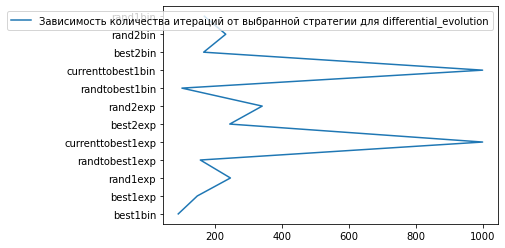

In [19]:
nits = []
for s in strategies:
    res = differential_evolution(ackley, bounds, seed=42, strategy=s)
    nits.append(res.nit)

plt.plot(nits, strategies, label='Зависимость количества итераций от выбранной стратегии для differential_evolution')
plt.legend()
plt.show()

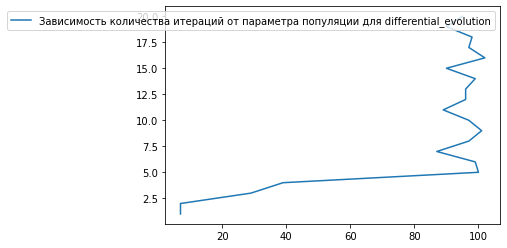

In [26]:
nits = []
for p in popsizes:
    res = differential_evolution(ackley, bounds, seed=42, popsize=int(p))
    nits.append(res.nit)

plt.plot(nits, popsizes, label='Зависимость количества итераций от параметра популяции для differential_evolution')
plt.legend()
plt.show()
# Похоже популяцию лучше бы по-меньше

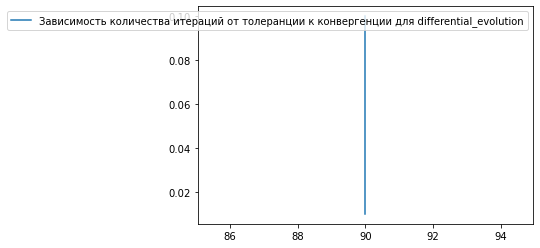

In [37]:
nits = []
for t in tols:
    res = differential_evolution(ackley, bounds, seed=42, tol=t)
    nits.append(res.nit)

plt.plot(nits, tols, label='Зависимость количества итераций от толеранции к конвергенции для differential_evolution')
plt.legend()
plt.show()
# Как-то не зависит особо)

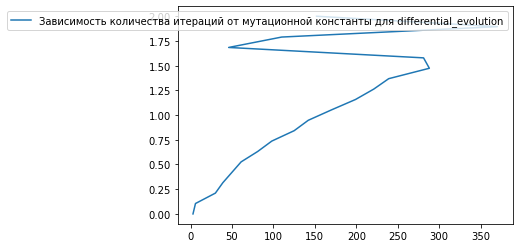

In [38]:
nits = []
for m in mutations:
    res = differential_evolution(ackley, bounds, seed=42, mutation=m)
    nits.append(res.nit)

plt.plot(nits, mutations, label='Зависимость количества итераций от мутационной константы для differential_evolution')
plt.legend()
plt.show()
# Сложнаааа. Но очевидно лучше 0, почему-то)

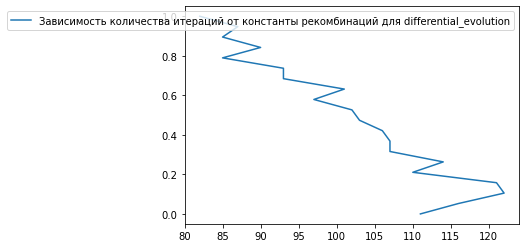

In [39]:
nits = []
for r in recombinations:
    res = differential_evolution(ackley, bounds, seed=42, recombination=r)
    nits.append(res.nit)

plt.plot(nits, recombinations, label='Зависимость количества итераций от константы рекомбинаций для differential_evolution')
plt.legend()
plt.show()
# надо 0.7

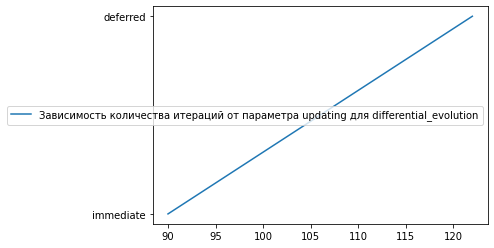

In [42]:
nits = []
for u in updatings:
    res = differential_evolution(ackley, bounds, seed=42, updating=u)
    nits.append(res.nit)

plt.plot(nits, updatings, label='Зависимость количества итераций от параметра updating для differential_evolution')
plt.legend()
plt.show()
# Надо immediate:)

In [6]:
'''
Дополнительное задание.
Найти множество параметров (strategy=..., ..., updating=...),
которые требуют минимального количества итераций.
'''

'\nДополнительное задание.\nНайти множество параметров (strategy=..., ..., updating=...),\nкоторые требуют минимального количества итераций.\n'

In [7]:
ackley_bounds = [(-10, 10), (-10, 10)]
def task2(x):
    res = differential_evolution(ackley, ackley_bounds, seed=42, popsize=x[0], tol=x[1], mutation=x[2], recombination=x[3])
    return res.nit

In [36]:
# Как победить эту ошибку?:(
task2_bounds = [(1, 20), (0.01, 0.1), (0.0, 2.0), (0, 1)]
res = differential_evolution(task2, task2_bounds, seed=42)

RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'